## ML 1-2. Tensorflow & Keras 기본

## 0.Deep Learning Framework
- Deep Learning 구현을 할 수 있도록 도와주는 Software
- 종류 : TensorFlow, PyTorch, Keras, Caffe/Caffe2, Theano, MXNET, CNTK, ... 등
- **TensorFlow** 
  - Open source software library
  - Originally developed by Google Brain Team
  - Gmail, Google 포토, 음성 인식에서 사용되는 프레임워크
  - 무료, 신뢰성 및 구글의 지원
  - 딥러닝을 구현하기 훨씬 쉬워짐
  - Python, JavaScript, C++, Java, Go, C#, Haskell, Julia, MATLAB, Ruby, Rust, Scala programming languages을 사용하여 TensorFlow 코드 작성 가능
  - 개발자를 위한 광범위한 문서


## 1.Tensorflow Basic - Tensorflow API
- https://www.tensorflow.org/api_docs/python/tf?hl=ko
- https://www.tensorflow.org/api_docs/python/tf/all_symbols

In [ ]:
import tensorflow as tf
tf.__version__

### 1-01. Tensor Object
- tf.Tensor
  - shape
  - dtype
  - name
  - device : tensor가 생성될 장치 이름
  - op : tensor를 출력으로 생성하는 tf.Operation, Error in eagar mode
  - graph : tenser를 포함하는 tf.Graph, Error in eagar mode
  - eval(feed_dict, session) : 노드를 평가(실행), Error in eagar mode
- 다차원 배열
- Tensorflow 모든 연산은 자동으로 Python Native Type을 Tensor로 변환
  - 명시적 변환 : tf.convert_to_tensor(value, dtype, dtype_hit, name)

In [ ]:
import tensorflow as tf

t1 = tf.convert_to_tensor(1)
t2 = tf.convert_to_tensor(2)

ret1 = tf.add(t1, t2)
display(t1, t2, ret1)
display(ret1.shape, ret1.dtype)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

<tf.Tensor: shape=(), dtype=int32, numpy=2>

<tf.Tensor: shape=(), dtype=int32, numpy=3>

TensorShape([])

tf.int32

In [ ]:
# broadcasting
ret2 = tf.add([[1, 2], [3, 4]], 1)
print(ret2)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [ ]:
# broadcasting
print(ret1 * ret2)

tf.Tensor(
[[ 6  9]
 [12 15]], shape=(2, 2), dtype=int32)


In [ ]:
t3 = tf.convert_to_tensor(range(1, 10, 2), tf.float32)
t4 = tf.cast(t3, tf.int32)
display(t3, t4)

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 3., 5., 7., 9.], dtype=float32)>

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9], dtype=int32)>

In [ ]:
import numpy as np
t5 = tf.convert_to_tensor(np.array([1, 2, 3]))
res3 = tf.add(t5, 2)
display(t5, res3, res3.numpy(), res3.numpy().tolist())

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([3, 4, 5])>

array([3, 4, 5])

[3, 4, 5]

### 1-02. Constant
- 변경되지 않는 상수 값을 갖는 Tensor를 생성하는 함수
- tf.constant(value, dtype, shape, name)
  - value : Tensor가 갖는 값
  - dtype = None : 데이터 타입
  - shape = None : Tensor의 차원별 element 개수
  - name = 'Const' : constant의 이름
- Tensor 변환 함수를 갖는 모든 객체에 사용 가능
- tf.convert_to_tensor()는 shape를 지정할 수 없지만 tf.constant는 shape 지정가능


In [ ]:
# constant
c = tf.constant(1)
display(type(c), c)

tensorflow.python.framework.ops.EagerTensor

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
# constant
d = tf.constant(2, shape=(3,))
display(type(d), d)

tensorflow.python.framework.ops.EagerTensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 2, 2], dtype=int32)>

### 1-03. 연산자
- tf.add(a, b) : a + b
- tf.subtract(a, b) : a - b
- tf.multiply(a, b) : a * b
- tf.divide(a, b) : a / b
- tf.pow(a, b) : a ** b
- tf.mod() : a % b
- tf.greater_equal() : a >= b
- tf.greater() : a > b
- tf.less_equal() : a <= b
- tf.less() : a < b
- tf.logical_and(a, b) : a & b
- tf.logical_or(a, b) : a | b
- tf.logical_not(a) : ~a
- tf.abs(a) : abs(a)
- tf.negative(a) : -a

### 1-04. Variable
- Tensor는 상태가 없고 변경 불가 객체(Immutable stateless object)
- 훈련을 통해 변경될 값(weight, bias) 필요
- 값 변경을 위한 API 필요
- tf.Variable(초기값)
   - assign(새로운값)
- 연산 후 할당 함수
   - tf.assign_add(), tf.assign_sub()
- GradientTape에 의해 자동 추적

In [ ]:
import tensorflow as tf

v = tf.Variable(1, dtype=tf.float32, name='x')
print(v)

v.assign(2)
print(v)

v.assign(tf.square(v))
print(v)

v.assign_sub(0.1)   # v-0.1

<tf.Variable 'x:0' shape=() dtype=float32, numpy=1.0>
<tf.Variable 'x:0' shape=() dtype=float32, numpy=2.0>
<tf.Variable 'x:0' shape=() dtype=float32, numpy=4.0>


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=3.9>

### 1-05. 난수 생성
- 균등 분포(uniform distribution)
  - tf.random.uniform(shape, minval=0, maxval=None) : 0 <= x < 1
- 정규 분포(normal distribution)
  - tf.random.normal(shape, mean=0.0, stddev=1.0) : 정규 분포
  - tf.random.truncated_normal(shape, mean=0.0, stddev=1.0) : 절단 정규 분표

In [ ]:
x = tf.Variable(tf.random.normal([]), name='x')
y = tf.Variable(tf.random.normal([2, 3]), name='y')
print(f'x : {x}')
print(f'y : {y}')

x : <tf.Variable 'x:0' shape=() dtype=float32, numpy=-0.051764403>
y : <tf.Variable 'y:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1.9099338 ,  0.79499316, -1.9696    ],
       [ 0.0808175 , -0.23997426,  1.0967802 ]], dtype=float32)>


### 1-06. 자동 미분
- 컨텍스트 내의 모든 정방향(forward-pass) 연산을 Tape에 기록
- 역방향 자동 미분 연산(reverse mode differentiantion) 후 폐기
- **tf.GradientTape([persistent=True])**
  - gradient()  : 1회용 사용
  - persistent=True : 동일한 연산에 대해 여러 미분을 계산
- 컨텍스트 내의 중간 값도 미분 가능
- 연산내 추적
  - Variable은 자동 추적
  - constant는 tape.watch(const) 필요


In [ ]:
# 자동 미분

x = tf.Variable(3.0)
#x = tf.constant(3.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x ** 2 # 2 * x
    z = 2 * y  # 2 * x**2 => 4 * x
    display(x, y, z)

dy_dx = tape.gradient(y, x) 
dz_dx = tape.gradient(z, x) 
display(dy_dx, dz_dx)
del tape

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [ ]:
# XOR Gate 
X = tf.constant([[0,0], [0,1], [1,0], [1,1]], dtype=tf.float32)
y = tf.constant([[0],[1],[1],[0]], dtype=tf.float32)

W1 = tf.Variable([[5,-7],
                  [5,-7]], dtype=tf.float32)
b1 = tf.Variable([[-8, 3]], dtype=tf.float32)

W2 = tf.Variable([[-11], [-11]], dtype=tf.float32)
b2 = tf.Variable([[6]], dtype=tf.float32)

L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
L2 = tf.sigmoid(tf.matmul(L1, W2) + b2)

print(L2)
h = tf.cast(L2 > 0.5, tf.float32)
print(h)
tf.reduce_mean(tf.cast(y == h, tf.float32))

### 1-07. 그외 함수
- tf.cast(x, dtype)
  - x의 dtype을 변경
  - x에 조건을 주어 x > 0.5 와 같이 특정 상황에서 변경하도록 할 수 있음
  - 조건을 줄 경우 True인 경우 1, False 인 경우 0을 의미하는 dtype의 숫자가 반환됨

- tf.sigmoid(x)
   - x에 대한 sigmoid 함수 적용 값 구함

- tf.reduce_mean(x)
   - x에 대한 평균을 구함
   - np.mean(x)과 동일함 

In [ ]:
import tensorflow as tf
import numpy as np

x = tf.Variable(np.array([0.9, 0.5, 0.7, 0.3, 0.8]))
y = tf.cast(x, dtype=tf.int32)
z = tf.cast(x > 0.5, dtype=tf.int32)
print(y.numpy(), z.numpy())

[0 0 0 0 0] [1 0 1 0 1]


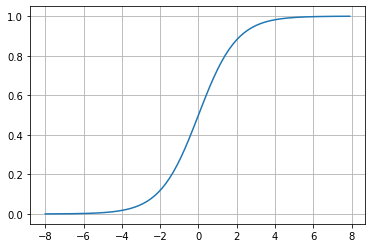

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-8, 8, 0.1)
y = tf.sigmoid(x)
plt.plot(x, y)
plt.grid()
plt.show()

In [ ]:
import numpy as np

x1 = tf.Variable(np.array([0.9, 0.5, 0.7, 0.3, 0.8]))
y = np.mean(x1.numpy())
z = tf.reduce_mean(x1).numpy()
print(f'y = {y:.6f}, z = {z:.6f}')

y = 0.640000, z = 0.640000


In [ ]:
x2 = tf.Variable(np.array([[0.9, 0.5, 0.7], [0.3, 0.8, 0.2]]))
y = np.mean(x2.numpy())
z = tf.reduce_mean(x2).numpy()
print(f'y = {y:.6f}, z = {z:.6f}')

y = 0.566667, z = 0.566667


- tf.squeeze(axis=None, name=None)
  - 불필요 축 제거
  - axis를 지정하지 않으면 길이가 1 인 shape을 제거
  - axis를 지정하면 해당 축을 제거함 (목록으로 지정 가능)


In [ ]:
# 't' is a tensor of shape [1, 2, 1, 3, 1, 1]
tf.shape(tf.squeeze(t))  # [2, 3]

In [ ]:
# 't' is a tensor of shape [1, 2, 1, 3, 1, 1]
tf.shape(tf.squeeze(t, [2, 4]))  # [1, 2, 3, 1]

### 1-08. Neural Network Visualization
- TensorSpace : https://tensorspace.org/index.html

## 2.Keras Basic - Keras API
- https://www.tensorflow.org/api_docs/python/tf/keras?hl=ko

### 2-01. Optimizer
- tf.keras.optimizers.Optimizer(learning_rate)
  - base class, 직접 사용 불가
  - learning_rate : 0.1 ~ 0.0001
- SGD : 확률적 경사하강법(Stochostic Gradient Descent), 가장 기초적인 Optimizer, 조금씩 데이터를 검토한 뒤 자주 방향을 찾자  
- Adam : gradient, learning rate를 모두 고려해서 방향을 찾자
- Adagrad : (learning rate) 처음엔 빠르게 학습하고 나중엔 세밀하게 학습, parameter별 learning rate 최적화
- RMSprop : (learning rate) 세밀하게 학습하되, 상황을 보며 정도를 정함
- Adadelta : (learning rate) 세밀한 정보가 너무 작아져서 학습이 안되는 것을 막자, 차원 마다 적응적 learning_rate
- Adamax : Max norm을 기반으로 한 Adam의 변형
- Nadam : Nesterov 모멘텀 + Adam


In [ ]:
- Momentum : Gradient를 미분한 것에 관성 개념을 도입해 덜 비틀거리면서 찾도록 하는 기법

### 2-02. Layer
- Layer Neural Network의 '하나의 Layer를 추상화'
- tf.keras.layers.Layer(trainable, name, dtype, dynamc)
   - 기반 클래스로 직접 사용은 불가능
- tf.keras.layers.Dense(units, activation, use_bias, kernel_initializer, bias_initilizer, ...)
   - 가장 일반적인 DNN의 완전 연결층
   - units : 필수, 출력 shape, 샘플 축 생략
   - input_shape : 첫 번째 층인 경우 사용
   - 예) Dense(32, input_shape = (784,)) : 입력 n * 784, 출력 : 32
   - 예) Dense(10) : 입력층 생략, 이전 층의 출력의 갯수로 자동 지정
- tf.keras.layers.RNN, LSTM, GRU
   - 순환 네트워크, 시계열이나 시퀀스에 사용
- tf.keras.layers.Conv2D
   - 이미지 특징 추출 및 분류용
- tf.keras.layers.Dropout(rate, ...)
   - Dropout 용

### 2-03. Model, Sequential
- https://www.tensorflow.org/guide/keras/sequential_model?hl=ko
- tf.keras.Sequential(layers)
  - tf.keras.Model 상속
  - layers : **순서를 갖는 layer stack 생성**
  - **add(layer) : 계층 추가**
  - complie(optimizer, loss, metrics, ...) : 훈련을 위한 모델 설정
    - optimizer : tf.keras.losses 내의 객체 또는 이름(str)
    - loss : tf.keras.losses 내의 객체 또는 이름(str)
    - metics : 훈련과 테스트 과정에서 평가에 사용할 객체
  - summary() : Network의 Layer와 parameter 개수 출력
  - history = fit(x, y, batch_size, epochs, verbose, callbacks, validation_split, validation_data, ...) : 모델 학습
     - history : 학습 동안의 loss 등의 메트릭 기록 (dictionary, 기록 항목 별)
  - evaluate(x, y, ...) : 테스트 결과 반환
  - predit(x, ...) : 예측 결과 반환
  - save(filepath, ...) : 모델 파일 저장
  - trainable_variables : 학습할 변수 목록
- tf.keras.models.load_model(filepath) : 모델 복원

### 2-04. Callback
- 매 batch 마다 호출할 함수 전달
  - model.fit(callbacks=[cb])
- tf.keras.callbacks.Callback
  - callback 생성을 위한 base class, 상속해서 구현
  - on_train_batch_begin() : 훈련 배치 시작
  - on_train_batch_end() : 훈련 배치 끝
  - on_test_batch_begin() : 테스트 배치 시작
  - on_test_batch_end() : 테스트 배치 끝
- 미리 구현된 Callback 클래스들
  - tf.keras.callbacks
     - EarlyStopping
     - TensorBoard
     - ModelCheckpoint
     

#### 2-04-1.  EarlyStopping Callback
- EarlyStopping(monitor, patience)
   - 관찰하는 값(metric)이 개선되지 않을 때 훈련 종료
   - 과적합 방지 기법
   - monitor : 관찰 대상 값 이름
   - min_delta : 개선 된 값으로 간주할 최소한의 변화 값
   - patience : 개선이 없으면 훈련을 종료할 epoch 횟수

### 2-05. Dropout
- Overfitting 방지 기법
- 학습하는 동안 무작위로 학습에서 노드 제외
- tf.keras.layers.Dropout(rate)
   - rate : 0.0 ~ 1.0,  (0.5 이하 추천)

   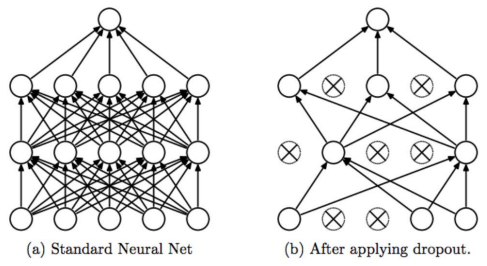

### 2-05. Convolution
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
- conv = tf.keras.layers.Conv2D(filters, kernel_size, strides, padding, ... activation, ... kernel_initializer, ... input_shape,...)
  - filters : 커널 개수
  - kernel_size : 커널 크기
  - strides=(1,1) : 커널 이동 간격, 2D
  - padding : 출력 보간 방법
     - Convolution 연산 후 생기는 외곽 영역 공백 채우기 기법
     - "SAME" : 출력 크기를 입력 크기와 같게되도록 채우기
     - "VALID" : 보간 없음
  - activation : 활성화 함수
  - kernel_initializer : 커널 생성 
     - shape of kernel : (height, width, in_channel, out_channel) 
  - input_shape : 입력 shape (height, width, channel)
- conved = conv(input) 
1. input : 입력 tensor
  - shape of input : (batch, height, width, channel)
  - shape : (N, H, W, C)
     - N : number of images(samples)
     - H : Height of the image
     - W : Width of the image
     - C : Channel(Color) count of the image
  - shape length : 1, 2, 4
     - 1 : (n) : (1, n, n, 1)
     - 2 : (n, m) : (1, n, m, 1)
     - 4 : (n, h, w, c)  
2. conved : convolution의 결과 tensor
  - shape of conved : (batch, height, width, filters)
  - shape : (N, H, W, F)
     - N : number of images(samples)
     - H : Height of the image
     - W : Width of the image
     - F : Filter count      

### 2-06. MaxPooling
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
- mp = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides, padding, ...)
  - pool_size=(2,2) : window size => 2D
  - strides : 이동 간격
  - padding : {"VALID", "SAME"}
- pooled = mp(input)  
1. input : 입력 tensor
  - shape of input : (batch, height, width, channel)
  - shape : (N, H, W, C)
     - N : number of images(samples)
     - H : Height of the image
     - W : Width of the image
     - C : Channel(Color) count of the image
  - shape length : 1, 2, 4
     - 1 : (n) : (1, n, n, 1)
     - 2 : (n, m) : (1, n, m, 1)
     - 4 : (n, h, w, c)  
2. pooled : pooling 결과 tensor
  - shape of pooled : (batch, height, width, channel)
  - shape : (N, H, W, C)
     - N : number of images(samples)
     - H : Height of the image after pooling
     - W : Width of the image after pooling
     - C : Channel(Color) count of the image


### 2-07. Flatten
- tf.keras.layers.Flatten
  - 입력을 1차원으로 만들어서 출력 (배치 크기 무관)

### 2-08. Pre-trained Model
- Keras Pre-trained Models : ImageNet 1000가지 class로 훈련된 모델 제공
- https://keras.io/api/applications/
  - Xception, VGG16, VGG19, ResNet, ResNetV2, ResNeXt, InceptionV3, InceptionResNetV2, ...
- download : ~/.keras/model/
   - xxx.h5 : 학습된 모델
   - imagenet_class_index.json : Label 파일
- Tensorflow Hub : 재사용 가능한 모델 공유
   - https://www.tensorflow.org/hub
   - https://tfhub.dev/ : 원하는 모델 검색
   - 설치 : pip install tensorflow_hub

## 3.Linear Regression - tensorflow

### 2-01. SLP - random data, tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

m = 50
# 데이터 준비
X = tf.constant(range(m), tf.float32)
y = X*2 + tf.random.normal((m,)) * 10
print(X.shape, y.shape)
plt.plot(X, y, 'bo')

# 학습 과정 - 1. W 값 초기화
W = tf.Variable(tf.random.normal(()))
plt.plot(X, W*X, 'b', label='init W')

# 2. lr 값 설정 (hyper-parameter)
lr = 0.0001  # learning rate

# 3. 학습 횟수 설정 (Epoch = 100)
for i in range(100):
    # 4. 자동 미분을 위한 객체 생성
    with tf.GradientTape() as tape:
        h = W * X   # 5. 출력 값 구하기
        cost = tf.keras.losses.MSE(y, h)  # 6. loss function - 오차값 구하기
    dw = tape.gradient(cost, W)  # 7. cost, W를 사용하여 미분 값 구하기
    W.assign(W - lr*dw)  # 8. 미분값과 learning rate의 곱을 사용하여 W 값 갱신 
    plt.plot(X, W*X, '--')   
    
    if not i % 20 :
        print(f'{i}, cost:{cost.numpy():.3f}, W:{W.numpy():.3f}')

plt.plot(X, W*X, 'r-', label='final W')
plt.legend()

### 2-02. MLP -XOR 게이트, tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
tf.random.set_seed(777)
np.random.seed(0)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# 1번째 층 변수 생성
W1 = tf.Variable(tf.random.normal([2,2], seed=0))
b1 = tf.Variable(tf.random.normal([2], seed=0))
# 2번째 층 변수 생성
W2 = tf.Variable(tf.random.normal([2,1], seed=0))
b2 = tf.Variable(tf.random.normal([1], seed=0))

lr = 0.1
ephochs = 101
for step in range(ephochs):
    with tf.GradientTape() as tape:        
        # 1번째 층 연산
        L1 = tf.sigmoid(tf.matmul(X, W1) + b1)
        # 2번째 층 연산
        H0 = tf.sigmoid(tf.matmul(L1, W2) + b2)
        # cost 계산
        cost = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, H0))
        #cost2 = tf.keras.losses.MSE(y, H0)
        # cost 미분 연산으로 기울기 계산
        d_W1, d_b1, d_W2, d_b2 = tape.gradient(cost, [W1, b1, W2, b2])
        # 변수 업데이트
        W1.assign_sub(d_W1 * lr)
        b1.assign_sub(d_b1 * lr)
        W2.assign_sub(d_W2 * lr)
        b2.assign_sub(d_b2 * lr)
        if step % 500 == 0: 
            print(f"step:{step:5d}, cost:{cost:.6f}")

pred = tf.cast(H0 > 0.5, dtype=tf.float32)
acc = np.mean(pred == y)

print(f"Hypothesis:\n{H0} \nPredicted:\n{pred} \nAccuracy:{acc}")
print(f"w1:\n{W1.numpy()}, \nb1:\n{b1.numpy()}, \nw2:\n{W2.numpy()}, \nb2:\n{b2.numpy()}")


step:    0, cost:0.694770
Hypothesis:
[[0.5169749 ]
 [0.51099676]
 [0.49234232]
 [0.48809037]] 
Predicted:
[[1.]
 [1.]
 [0.]
 [0.]] 
Accuracy:0.5
w1:
[[ 0.5651718   0.54581314]
 [ 0.23595315 -0.9126565 ]], 
b1:
[-0.07970141 -0.8528329 ], 
w2:
[[-0.6309195]
 [-0.086327 ]], 
b2:
[0.39659023]


### 2-03. 보스톤 주택 - keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers
from sklearn.preprocessing import StandardScaler
import numpy as np


tf.random.set_seed(0)
np.random.seed(0)
boston = boston_housing.load_data()

(X_train, y_train), (X_test, y_test) = boston
print(X_train.shape, X_test.shape)


(404, 13) (102, 13)


In [ ]:
print(type(boston))

<class 'tuple'>


In [ ]:
# X 데이터에 대해서만 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [ ]:
# 학습을 위해 사용
model = models.Sequential()
model.add(layers.Dense(64, activation='relu'
               , input_shape=(X_train.shape[1],),  kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dense(1) )
model.compile(optimizer='adam', loss='mse',metrics=['mae', r2])

history = model.fit(X_train, y_train ,epochs=200, batch_size=100, validation_split=0.2)
print("Train eval:", model.evaluate(X_train, y_train, batch_size=y_train.shape[0]))
print("Test eval:", model.evaluate(X_test, y_test, batch_size=y_test.shape[0]))

In [ ]:
from sklearn.metrics import r2_score

print("Train R2:", r2_score(y_train, model.predict(X_train)))
print("Test R2:", r2_score(y_test, model.predict(X_test)))

print("Train R2 : ", r2(y_train, model.predict(X_train).reshape(-1)).numpy())
print("Test R2 : ", r2(y_test, model.predict(X_test).reshape(-1)).numpy())
model.predict(X_test).shape

- $\alpha$ aplha
- $\beta$ beta
- $\gamma$ gamma
- $\delta$ delta
- $\epsilon$ epsilon
- $\zeta$ zeta
- $\eta$ eta
- $\theta$ theta
- $\kappa$ kappa
- $\lambda$ lambda
- $\mu$ mu
- $\nu$ nu
- $\xi$ xi
- $\pi$ pi
- $\rho$ rho
- $\tau$ tau
- $\phi$ phi
- $\chi$ chi
- $\psi$ psi
- $\omega$ omega
- $2^2$
- $L_1$
- $sum$

